# [Lab] Image Classification: Cats vs Dogs

## Modules

In [67]:
# Importing necessary libraries for numerical operations
import numpy as np

# Importing TensorFlow for machine learning tasks
import tensorflow as tf

# Importing TensorFlow Datasets for convenient access to common datasets
import tensorflow_datasets as tfds

# Importing specific layers and optimizers from Keras for building neural networks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

# Importing Matplotlib for creating visualizations
import matplotlib.pyplot as plt

## Dataset

In [68]:
# Function for preprocessing images before feeding them into the neural network
def preprocess_image(image, label):
    # Resize the input image to the desired dimensions (128x128)
    image = tf.image.resize(image, (128, 128))

    # Normalize pixel values to the range [0, 1]
    image = image / 255.0

    # Return the preprocessed image and its corresponding label
    return image, label

In [69]:
# Define the name of the dataset
dataset_name = 'cats_vs_dogs'

# Load the dataset using TensorFlow Datasets, splitting it into training and testing sets
# as_supervised=True ensures that the dataset is loaded as (image, label) pairs
# with_info=True returns additional information about the dataset, such as metadata
(train_data, test_data), info = tfds.load(name=dataset_name, split=['train[:80%]', 'train[80%:]'], as_supervised=True, with_info=True)

# Apply the preprocess_image function to each image in the training and testing sets
train_data = train_data.map(preprocess_image)
test_data = test_data.map(preprocess_image)

# Create a validation set by taking the first 1000 preprocessed images from the training set
validation_data = train_data.take(1000)

# Update the training set by skipping the first 1000 preprocessed images (used for validation)
train_data = train_data.skip(1000)

## Explore

In [71]:
# Mapping of numerical labels to corresponding animal names
label2animal = {
    1: "Dog",  # Label 1 corresponds to a Dog
    0: "Cat"   # Label 0 corresponds to a Cat
}

In [72]:
# Function to plot images along with their corresponding labels
def plot_images(data, num_images=9):
    # Lists to store images and labels for plotting
    images = []
    labels = []

    # Iterate through the dataset and extract images and labels
    for example in data.take(num_images):
        image, label = example[0], example[1]
        images.append(image.numpy())
        labels.append(label)

    # Set up the plotting area
    plt.figure(figsize=(8, 8))

    # Plot each image along with its corresponding label
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        # Display the animal label based on the numerical label
        plt.title(f'Animal: {label2animal[labels[i].numpy()]}')
        plt.axis('off')

    # Show the plot
    plt.show()

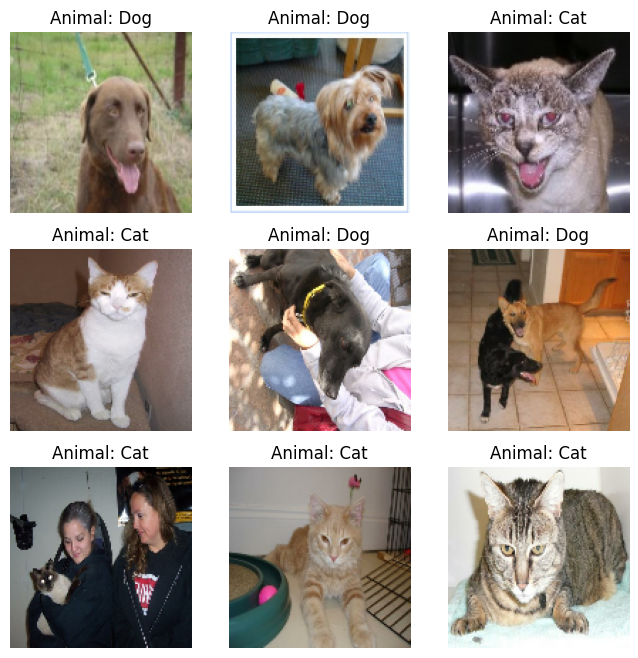

In [73]:
plot_images(train_data)

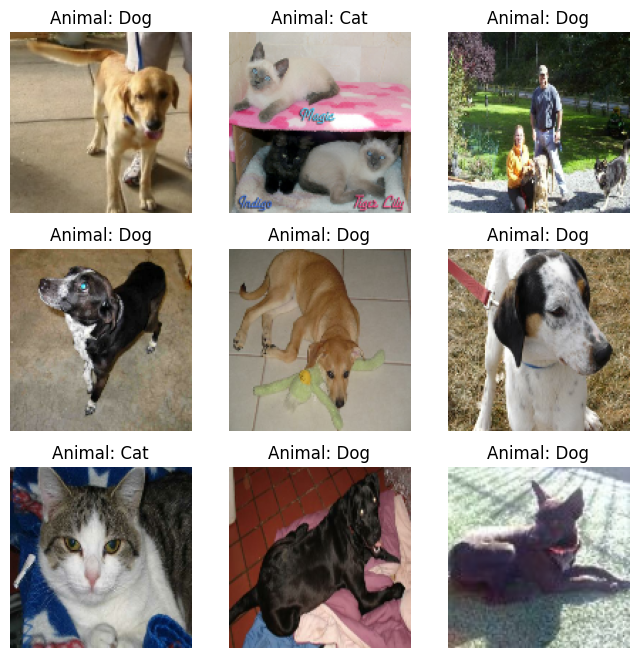

In [66]:
plot_images(test_data)

## Training

In [74]:
# Create a sequential model
model = tf.keras.Sequential([
    # Convolutional layer with 64 filters, each with a 3x3 kernel, and input shape of (128, 128, 3)
    Conv2D(64, (3, 3), input_shape=(128, 128, 3)),

    # Batch normalization to normalize the activations of the convolutional layer
    BatchNormalization(),

    # Activation function (Rectified Linear Unit - ReLU) to introduce non-linearity
    Activation('relu'),

    # Max pooling layer with a 2x2 pool size for spatial down-sampling
    MaxPooling2D(2, 2),

    # You can repeat the above pattern to add more convolutional layers for deeper representation learning

    # Flatten layer to convert the 2D feature maps to a 1D vector
    Flatten(),

    # Fully connected dense layer with 256 neurons
    Dense(256),

    # Batch normalization for the dense layer
    BatchNormalization(),

    # Activation function (ReLU) for the dense layer
    Activation('relu'),

    # You can repeat the above pattern to add more hidden layers for deeper learning

    # Output layer with a single neuron and sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

In [75]:
# Compile the model using Adam optimizer with a learning rate of your choice
model.compile(optimizer=Adam(learning_rate=0.01),
              # Binary cross-entropy loss is suitable for binary classification tasks
              loss='binary_crossentropy',
              # Metrics to monitor during training, accuracy is a common metric for classification
              metrics=['accuracy'])

In [77]:
# Train the model using the training data in batches of size 256, for 32 epochs
history = model.fit(train_data.batch(128),
                    epochs=8,
                    # Use the validation set for monitoring performance during training
                    validation_data=validation_data.batch(64))

Epoch 1/8
138/138 [==============================] - 25s 167ms/step - loss: 0.6245 - accuracy: 0.6473 - val_loss: 0.8205 - val_accuracy: 0.5490
Epoch 2/8
138/138 [==============================] - 25s 178ms/step - loss: 0.5588 - accuracy: 0.7095 - val_loss: 0.6529 - val_accuracy: 0.6380
Epoch 3/8
138/138 [==============================] - 25s 177ms/step - loss: 0.4907 - accuracy: 0.7573 - val_loss: 1.1346 - val_accuracy: 0.5630
Epoch 4/8
138/138 [==============================] - 23s 164ms/step - loss: 0.4133 - accuracy: 0.8079 - val_loss: 0.6875 - val_accuracy: 0.6580
Epoch 5/8
138/138 [==============================] - 25s 171ms/step - loss: 0.2956 - accuracy: 0.8751 - val_loss: 0.7928 - val_accuracy: 0.6430
Epoch 6/8
138/138 [==============================] - 25s 174ms/step - loss: 0.2061 - accuracy: 0.9140 - val_loss: 2.2102 - val_accuracy: 0.5830
Epoch 7/8
138/138 [==============================] - 25s 176ms/step - loss: 0.1402 - accuracy: 0.9474 - val_loss: 1.8190 - val_accuracy:

## Evaluation

In [81]:
# Function to plot training and validation history
def plot_training_history(history):
    # Set up the figure with two subplots (Loss and Accuracy)
    plt.figure(figsize=(8, 4))

    # Plot Training Loss and Validation Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training Accuracy and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Adjust layout for better visualization
    plt.tight_layout()

    # Show the plot
    plt.show()

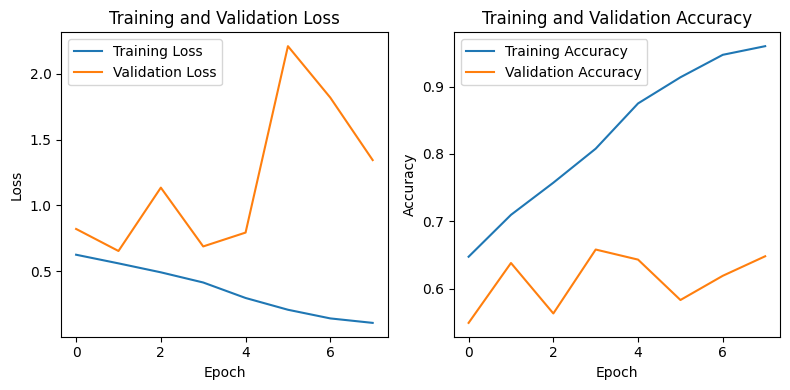

In [82]:
plot_training_history(history)

In [83]:
# Evaluate the model on the test data in batches of size 128
test_loss, test_accuracy = model.evaluate(test_data.batch(128))

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

37/37 [==============================] - 5s 109ms/step - loss: 1.3244 - accuracy: 0.6406
Test Accuracy: 64.06%


1/1 [==============================] - 0s 18ms/step


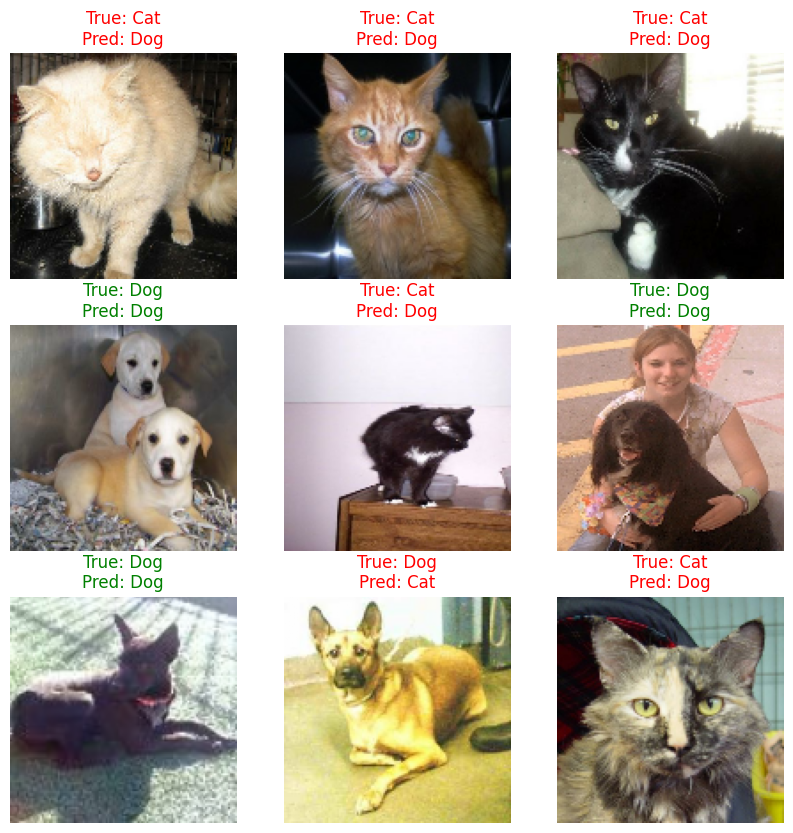

In [86]:
# Number of images to display
num_images = 9

# Lists to store images and labels for visualization
images = []
labels = []

# Randomly shuffle the test data and take a sample of num_images
for example in test_data.shuffle(buffer_size=100).take(num_images):
    images.append(example[0].numpy())
    labels.append(example[1].numpy())

# Convert the list of images to a NumPy array
sample_images = np.array(images)

# Make predictions using the trained model on the sample images
predictions = model.predict(sample_images)

# Set up the plotting area
plt.figure(figsize=(10, 10))

# Plot each image along with true and predicted labels
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])

    # Convert numerical labels to string labels (Dog or Cat)
    true_label = "Dog" if labels[i] == 1 else "Cat"
    pred_label = "Dog" if predictions[i] > 0.5 else "Cat"

    # Display true and predicted labels, with color highlighting correctness
    plt.title(f'True: {true_label}\nPred: {pred_label}', color='green' if true_label == pred_label else 'red')
    plt.axis('off')

# Show the plot
plt.show()